## PRÁCTICA 3 - Modelos de Probabilidad

Objetivos:

Manejo básico de estadística en Python:
    
- Representar y comparar distribuciones de probabilidad.
    
- Calcular probabilidades en distintas distribuciones. 

- Modelado de situaciones reales.

En esta práctica se va aprender el comportamiento de distintos modelos de probabilidad mediante la aplicación de sus distintos parámetros. Para ello, se va a utilizar la librería `scipy.stats`. Finalmente, vais a poder obtener la probabilidad aplicando el modelo de probabilidad que se ajuste a los distintos casos de ejemplo.

In [2]:
#Importamos las librerías que vamos a utilizar
import numpy as np
from scipy.stats import binom, norm, poisson
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#### 1. DISTRIBUCIÓN BINOMIAL  <br />
Hacer gráficos para la distribución binomial `B(n,p)` variando los parámetros (`scipy.stats` pone primero `n` y después `p`). Recordamos que el parámetro `n` (events) significa el número de intentos y que el parámetro `p` (trials) significa la probabilidad de que el suceso ocurra. 

- Dejar `p` constante y variar `n`: B(0.2,5), B(0.2,10), B(0.2,20)
- Dejar `n` constante y variar `p`: B(0.1,100), B(0.5,100), B(0.8,100)

Analizar las diferencias: al aumentar `n` y al variar `p`.

Para verificar las propiedades más inmediatas de la binomial, generar números aleatorios B(100,0.1) y comprobar las propiedades de la media y de la varianza:

`E(X) = n x p = 100 x 0.1 = 10`

`Var(X) = n x p x q = 100 x 0.1 x 0.9 = 9`

mean = 10.0
variance = 9.0


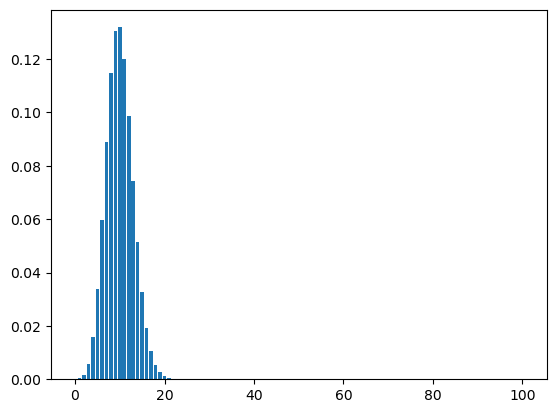

In [3]:
#Dejar cte p y variar n. Dejar cte n y variar p. 

n = 100
p = 0.1
# Definir una lista de valores r
r_values = list(range(n + 1))
# Obtener la media y la varianza
mean, var = binom.stats(n, p)
# Lista de los valores pmf
dist = [binom.pmf(r, n, p) for r in r_values ]
# Mostrar la media y la varianza
print("mean = "+str(mean))
print("variance = "+str(var))

#plotear los resultados
plt.bar(r_values, dist)
plt.show()

In [4]:
#Verificar las propiedades más inmediatas de la binomial

r = binom.rvs(100,.1,size=100)

print("media = ",r.mean())
print("varianza = ",r.var())

media =  10.12
varianza =  9.385600000000002


#### 2. DISTRIBUCIÓN DE POISON  <br />

Hacer gráficos para las distribuciones de Poisson tomando los siguientes valores para $\lambda$. 

Para $\lambda$ = 1, $\lambda$ = 10, $\lambda$ = 20. ¿Afecta la variación del parámetro $\lambda$ a la asimetría y al apuntamiento? 

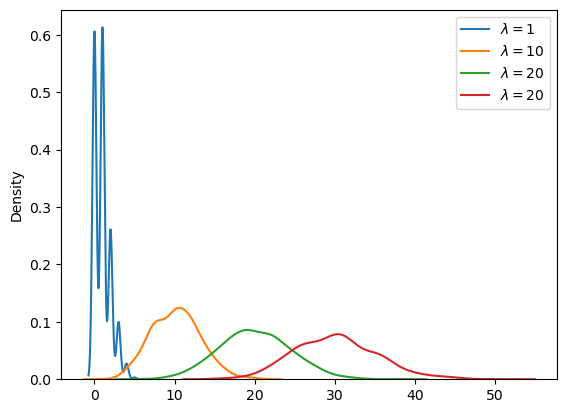

In [8]:
sns.distplot(np.random.poisson(lam=1, size=1000), 
             hist=False, label=r'$\lambda=1$')
sns.distplot(np.random.poisson(lam=10, size=1000),
             hist=False, label=r'$\lambda=10$')
sns.distplot(np.random.poisson(lam=20, size=1000),
             hist=False, label=r'$\lambda=20$')

plt.legend()
plt.show()

#### 3. DISTRIBUCIÓN NORMAL  <br />

Considerar distribuciones Normales con:

- $\sigma$ = 1 y variando $\mu$ = -1, 0, 1

- $\mu$ = 0 y variando $\sigma$ = 0.3, 0.5, 1.2

¿Afecta a la forma de la distribución y a su posición de los ejes? 

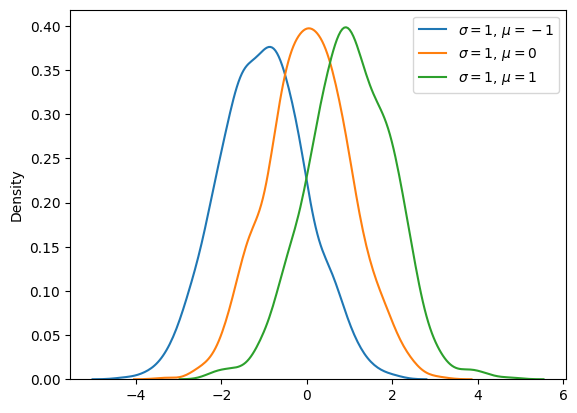

In [5]:
#sigma cte, variar la media
sns.distplot(np.random.normal(loc=-1,scale=1, size=1000),
             hist=False, label=r'$\sigma=1$, $\mu=-1$')
sns.distplot(np.random.normal(loc=0, scale=1, size=1000),
             hist=False, label=r'$\sigma=1$, $\mu=0$')
sns.distplot(np.random.normal(loc=1, scale=1, size=1000),
             hist=False, label=r'$\sigma=1$, $\mu=1$')

plt.legend()
plt.show()

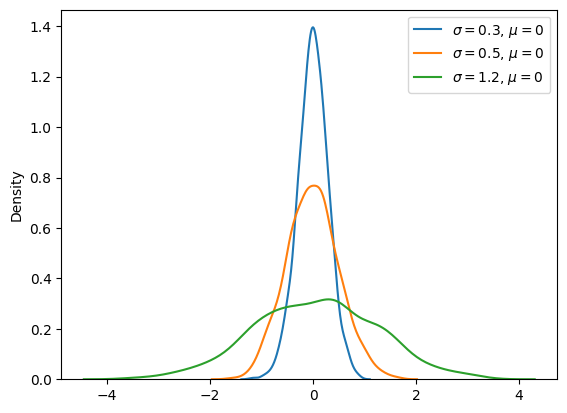

In [6]:
#media cte, variar sigma
sns.distplot(np.random.normal(loc=0, scale=.3, size=1000),
             hist=False, label=r'$\sigma=0.3$, $\mu=0$')
sns.distplot(np.random.normal(loc=0, scale=.5, size=1000),
             hist=False, label=r'$\sigma=0.5$, $\mu=0$')
sns.distplot(np.random.normal(loc=0, scale=1.2, size=1000),
             hist=False, label=r'$\sigma=1.2$, $\mu=0$')

plt.legend()
plt.show()

#### 4. DISTRIBUCIÓN EXPONENCIAL  <br />

Dibujar las funciones de densidad de la distribución exponencial variando la media $\lambda$⁻¹.

Considerar $\lambda$⁻¹ = 1,2,5. ¿Afecta el valor del parámetro $\lambda$⁻¹ a la forma de la función de densidad?

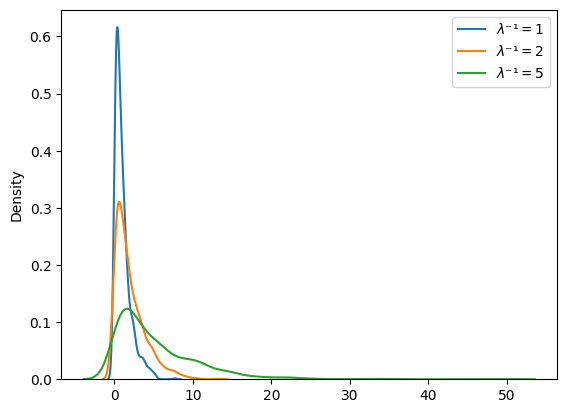

In [7]:
sns.distplot(np.random.exponential(scale=1, size=1000),
             hist=False, label=r'$\lambda⁻¹=1$')
sns.distplot(np.random.exponential(scale=2, size=1000),
             hist=False, label=r'$\lambda⁻¹=2$')
sns.distplot(np.random.exponential(scale=5, size=1000),
             hist=False, label=r'$\lambda⁻¹=5$')

plt.legend()
plt.show()

#### 5. Problema 1  <br />

La resistencia a la tracción de cierta pieza de sujeción de acero es una variable aleatoria, pues no existirán dos piezas de este tipo con exactamente la misma resistencia. La variable aleatoria que representa dicha resistencia en una pieza génerica se puede modelar con una distribución normal de media 268 kg/cm² y desviación típica 11 kg/cm². 

- Dibuja f(x) y F(x).
- ¿Cuál es la probabilidad de que la resistencia de una pieza cualquiera sea menor de 270 kg/cm²?
- ¿Cuál es la probabilidad de que la resistencia de una pieza cualquiera esté comprendida entre 255 y 280 kg/cm²?
- ¿Cuál es el valor de la resistencia que sólo es superada por el 25% de las piezas?
- Si se rechazan todas las piezas con resistencias menor de 242 kg/cm². ¿Cuál será el porcentaje de piezas rechazadas? 

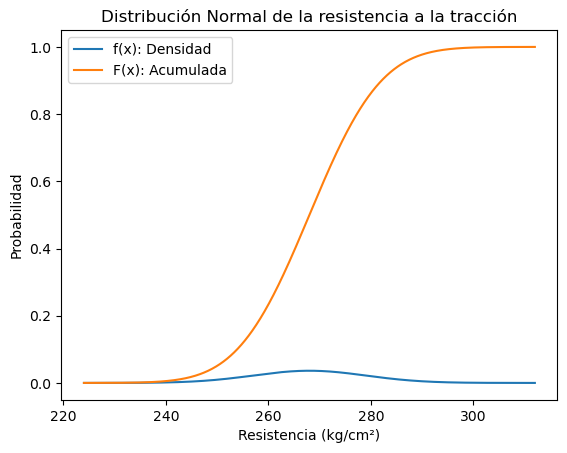

In [9]:
# Dibujar los graficos f(x) y F(x)
mu = 268  # media
sigma = 11  # desviación estándar

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

sns.lineplot(x=x, y=norm.pdf(x, mu, sigma), label='f(x): Densidad')
sns.lineplot(x=x, y=norm.cdf(x, mu, sigma), label='F(x): Acumulada')

plt.title("Distribución Normal de la resistencia a la tracción")
plt.xlabel("Resistencia (kg/cm²)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

In [10]:
#Probabilidad de que la resistencia de cualquier pieza sea menor de 270kg/cm2
p_menor_270 = norm.cdf(270, mu, sigma)
print("P(X < 270) =", round(p_menor_270, 4))

P(X < 270) = 0.5721


In [11]:
#Probabilidad de que la resistencia esté entre 255 y 280 kg/cm2
p_entre_255_280 = norm.cdf(280, mu, sigma) - norm.cdf(255, mu, sigma)
print("P(255 < X < 280) =", round(p_entre_255_280, 4))

P(255 < X < 280) = 0.7437


In [12]:
#Valor de resistencia que solo es superada por el 25% de las piezas
valor_percentil_75 = norm.ppf(0.75, mu, sigma)
print("Valor de resistencia superado por el 25% de las piezas:", round(valor_percentil_75, 2))


Valor de resistencia superado por el 25% de las piezas: 275.42


In [13]:
#Porcentaje de piezas con resistencias menores a 242kg/cm2
p_rechazo = norm.cdf(242, mu, sigma)
print("Porcentaje de piezas rechazadas (X < 242):", round(p_rechazo * 100, 2), "%")

Porcentaje de piezas rechazadas (X < 242): 0.9 %


#### 6. Problema 2  <br />

Un proceso productivo produce un 5% de artículos defectuosos. Supondremos que el estado defectuoso/aceptable de un artículo es independiente del resto de los artículos. Los artículos se venden en lotes de 90 artículos. Queremos saber:

- Probabilidad de que en un lote haya exactamente 4 artículos defectuosos. 
- Probabilidad de que en un lote tenga menos de 8 artículos defectuosos. 
- Probabilidad de que en un lote tenga 6 ó menos artículos defectuosos. 
- Calcula los cuartiles del número de artículos defectuosos que hay en un lote. 

In [14]:
n = 90     
p = 0.05    

# Probabilidad de que haya exactamente 4 artículos defectuosos
prob_4_defectuosos = binom.pmf(4, n, p)
print("P(X = 4):", round(prob_4_defectuosos, 4))

P(X = 4): 0.1939


In [15]:
# Probabilidad de que haya  menos de 8 artículos defectuosos
prob_menor_8 = binom.cdf(7, n, p)
print("P(X < 8):", round(prob_menor_8, 4))

P(X < 8): 0.9187


In [16]:
# Probabilidad de que en lote tenga 6 o menos artículos defectuosos
prob_menor_igual_6 = binom.cdf(6, n, p)
print("P(X ≤ 6):", round(prob_menor_igual_6, 4))

P(X ≤ 6): 0.8361


In [17]:
# Cuartiles del número de artículos defectuosos que hay en un lotes
q1 = binom.ppf(0.25, n, p)
q2 = binom.ppf(0.5, n, p)
q3 = binom.ppf(0.75, n, p)

print("Cuartil 25% (Q1):", int(q1))
print("Cuartil 50% (Q2 / Mediana):", int(q2))
print("Cuartil 75% (Q3):", int(q3))

Cuartil 25% (Q1): 3
Cuartil 50% (Q2 / Mediana): 4
Cuartil 75% (Q3): 6


#### 7. Problema 3  <br />

Un servidor de internet recibe una media 4.7 accesos al minuto durante la jornada laboral. En ese tiempo, los usuarios acceden al servidor con un ritmo estable y de forma independiente, de forma que los accesos por unidad de tiempo pueden aproximarse a un proceso de Poisson. 

- ¿Qué porcentaje del tiempo tendrá más de 4 accesos por minuto?
- Considerando el servidor anterior, ¿es cierto que el 50% de los minutos se reciben menos de dos accesos?
- Durante los fines de semana, el servidor anterior sólo recibe una media de 4 accesos por minuto. ¿Cuál es la probabilidad de que el servidor esté más de un minuto sin recibir llamadas? 

In [18]:
lam_laboral = 4.7

# Porcentaje de tiempo en el que hay más de 10 accesos por minuto
p_mas_4 = 1 - poisson.cdf(4, lam_laboral)
print("P(X > 4):", round(p_mas_4 * 100, 2), "% del tiempo")

P(X > 4): 50.54 % del tiempo


In [19]:
# b) ¿Es cierto que el 50% de los minutos se reciben menos de dos accesos?
p_menor_2 = poisson.cdf(1, lam_laboral)
print("P(X < 2):", round(p_menor_2 * 100, 2), "% del tiempo")
print("¿Es menor al 50%?", p_menor_2 < 0.5)

P(X < 2): 5.18 % del tiempo
¿Es menor al 50%? True


In [20]:
# c) Fines de semana: λ = 4 → P(T > 1 min sin llamadas) = P(X = 0)
lam_finsemana = 4
p_sin_llamadas = poisson.pmf(0, lam_finsemana)
print("P(sin accesos en 1 min, λ=4):", round(p_sin_llamadas * 100, 2), "%")

P(sin accesos en 1 min, λ=4): 1.83 %


#### Realizar un informe con los análisis realizados de cada uno de los apartados anteriores y exportarlo en un fichero .PDF

- El informe se realizará en un grupos de dos personas analizando los resultados obtenidos en cada uno de los apartados anteriores. Todas las gráficas deberán estar bien maquetadas: título, titulo en los ejes, ejes con un intervalo lógico y leyenda (si es el caso). El código empleado también se deberá incluir. 

- En el Moodle se encuentra un trabajo tipo para que tengáis de referencia. El archivo incluirá los nombres de todos autores en el siguiente formato:

- Nombre del archivo: Practica3_ApellidosNombre1_ApellidosNombre2.pdf (extensión obligatoria en .pdf)

- Se avisará en Moodle la fecha límite de entrega de este informe.